In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import time
import random

#plot
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from matplotlib.axes import Axes
from scipy.spatial import distance

import re

In [2]:
X_train=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\train_x_resample3000_boundarysel_50pergroup.csv")
y_train=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\train_y_resample3000_boundarysel_50pergroup.csv")
X_val=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\scaled_validation_feature.csv")
y_val=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\validation_label.csv")

In [3]:
X_train = X_train.drop(["predict_cluster"],axis=1)
y_train = y_train.drop(["predict_cluster"],axis=1)
X_val = X_val.drop(["Unnamed: 0"],axis=1)
y_val = y_val.drop(["Unnamed: 0"],axis=1)

In [4]:
X_train

,feature0,feature1,feature2,feature3,feature4
0,0.117651,0.285209,-0.302723,-0.624315,-1.479327
1,0.147586,0.221792,-0.305188,-0.571669,-1.616350
2,1.259228,0.245014,-0.304999,-0.889284,-0.615679
3,0.977743,0.168739,-0.307814,-0.916704,-0.865166
4,0.172629,-0.177533,-0.323227,-0.817478,-1.538269
5,0.061648,-0.209621,-0.317097,-0.826345,-1.182052
6,-0.127941,-0.217494,-0.314132,-0.877895,-1.665984
7,-0.089186,-0.265669,-0.317835,-0.927722,-1.781468
8,-0.051220,-0.321122,-0.318356,-0.917181,-1.925174
9,0.040025,-0.359712,-0.315545,-0.924859,-1.777884


In [5]:
#X_val = X_val.drop(["sourceofpixel"],axis=1)
#y_val = y_val.drop(["sourceofpixel"],axis=1)
#y_train = y_train.drop(["sourceofpixel"],axis=1)
#y_val = y_val.drop(["indexofpixel"],axis=1)
#y_train = y_train.drop(["indexofpixel"],axis=1)

In [4]:
def cal_score (y_pred,y_val):
    n11 = 0
    n12 = 0
    n21 = 0
    n22 = 0
    y_pred_array= np.array(y_pred)
    y_val_array= np.array(y_val)
    ita = np.nditer (y_pred_array)
    itb = np.nditer (y_val_array)
    while not ita.finished:
        if (ita[0]==2)&(itb[0]==2):
            n22 = n22+1
        elif (ita[0]==1)&(itb[0]==2):
            n12 = n12+1
        elif (ita[0]==2)&(itb[0]==1):
            n21 = n21+1
        else:
            n11 = n11+1
        ita.iternext()
        itb.iternext()
    Precall = n22 / ( n12 + n22)
    Pprecision = n22 / ( n21 + n22)
    f1_score = 2 / (1/Precall + 1/Pprecision)
    print ("n11:.."+str(n11)+"..n12:.."+str(n12)+"..n21:.."+str(n21)+"..n22:.."+str(n22))
    print ("TP:"+str(Precall))
    print ("f1 score:" + str(f1_score))
    FP = n21/(n21 + n11)
    FN = n12/(n12 +n22 )
    BER = 1/2*(FP+FN)
    print ("FP:"+ str(FP))
    print ("BER:" + str(BER))
    return Precall,f1_score,BER,FP

In [5]:
def nn_parameter(X_val,X_train,y_train):
    class_1=X_train[y_train['label']==1]
    class_2=X_train[y_train['label']==2]
    print(class_1.shape)
    print(class_2.shape)
    mean_1=np.array(class_1.mean()).reshape(1,-1)
    mean_2=np.array(class_2.mean()).reshape(1,-1)
    print(mean_2.shape)
    cov_1=np.matrix(class_1.cov())
    cov_2=np.matrix(class_2.cov())
    dis_1=distance.cdist(X_val,mean_1,metric='mahalanobis',V=cov_1).ravel()
    dis_2=distance.cdist(X_val,mean_2,metric='mahalanobis',V=cov_2).ravel()
    return dis_1, dis_2

In [6]:
dis_1, dis_2 =nn_parameter(X_val,X_train,y_train)

(199249, 5)
(49203, 5)
(1, 5)


In [7]:
dis_2.size

70027

In [8]:
#Nearest Mean algorithm
def nn_predict(dis_1,dis_2,alpha):
# get the k nearest mahalanobis distance
    y_pred=[]
    for index in range(len(X_val)):
        #if index%1000==0:
        #    print("the index is %d and time is %5.1f second"%(index,(time.time()-start)))
        if (alpha)*dis_1[index]<(1-alpha)*dis_2[index]:
                y_pred.append(np.float64(1.0)) #added the weight to the vote
        else:
                y_pred.append(np.float64(2.0))
        #y_proba_1.append(dis_2[index]/(dis_1[index]+dis_2[index]))
        #y_proba_2.append(dis_1[index]/(dis_1[index]+dis_2[index]))
    #print("NN STOP")
    y_pred=pd.Series(y_pred)
    return y_pred

In [9]:
y_pred=nn_predict(dis_1,dis_2,0.517)

In [10]:
y_pred = {"label_pred":y_pred}
y_pred = pd.DataFrame(data=y_pred)

In [11]:
Precall,f1_score,BER,FP = cal_score (y_pred,y_val['label']) 

n11:..50497..n12:..2058..n21:..10710..n22:..6762
TP:0.7666666666666667
f1 score:0.5143769968051118
FP:0.17497998594931952
BER:0.20415665964132643


In [12]:
def parameter_adjust (dis_1,dis_2):
    alpha = 0.50
    tp_list = []
    fp_list = []
    BER_list = []
    f1_score_list = []
    while(alpha<=0.54):
        print ("current alpha:"+str(alpha))
        y_pred_temp=nn_predict(dis_1,dis_2,alpha)
        Precall,f1_score,BER,FP = cal_score (y_pred_temp,y_val['label'])
        alpha = alpha +0.001
        tp_list.append(Precall)
        fp_list.append(FP)
        BER_list.append(BER)
        f1_score_list.append(f1_score)
        print("                 ")
    return tp_list, fp_list, BER_list, f1_score_list

In [13]:
tp_list,fp_list,BER_list, f1_score_list = parameter_adjust (dis_1,dis_2)

current alpha:0.5
n11:..52730..n12:..2753..n21:..8477..n22:..6067
TP:0.6878684807256236
f1 score:0.5193460023968498
FP:0.13849723070890585
BER:0.22531437499164114
                 
current alpha:0.501
n11:..52597..n12:..2700..n21:..8610..n22:..6120
TP:0.6938775510204082
f1 score:0.5197452229299363
FP:0.14067018478278628
BER:0.22339631688118905
                 
current alpha:0.502
n11:..52487..n12:..2671..n21:..8720..n22:..6149
TP:0.6971655328798186
f1 score:0.5191439064544725
FP:0.14246736484389041
BER:0.2226509159820359
                 
current alpha:0.503
n11:..52360..n12:..2608..n21:..8847..n22:..6212
TP:0.7043083900226758
f1 score:0.5202897943799992
FP:0.1445422909144379
BER:0.2201169504458811
                 
current alpha:0.504
n11:..52241..n12:..2546..n21:..8966..n22:..6274
TP:0.7113378684807257
f1 score:0.5215295095594348
FP:0.14648651298054144
BER:0.21757432224990791
                 
current alpha:0.505
n11:..52125..n12:..2499..n21:..9082..n22:..6321
TP:0.7166666666666667


In [35]:
#function plot the ROC
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [ ]:
#alpha: 0.4:0.1:0.7  find the best result between [0.50,0.54]

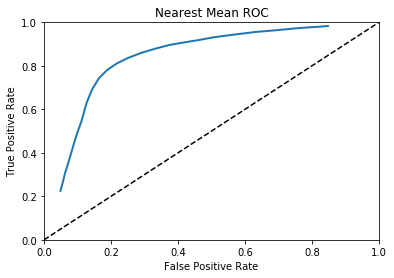

In [64]:
plt.title("Nearest Mean ROC")
plot_roc_curve(fp_list,tp_list,label='Nearest Mean')
plt.show()

In [ ]:
'''
current alpha:0.5000000000000001
n11:..52414..n12:..2714..n21:..8793..n22:..6106
TP:0.6922902494331066
f1 score:0.5148615034360638
FP:0.14366003888444132
BER:0.22568489472566738
                 
current alpha:0.5100000000000001
n11:..51170..n12:..2263..n21:..10037..n22:..6557
TP:0.7434240362811791
f1 score:0.5160147949948847
FP:0.1639845115754734
BER:0.21028023764714712
                 
current alpha:0.5200000000000001
n11:..49674..n12:..1931..n21:..11533..n22:..6889
TP:0.7810657596371882
f1 score:0.5057631598267381
FP:0.18842616040648946
BER:0.20368020038465062
                 
current alpha:0.5300000000000001
n11:..47829..n12:..1656..n21:..13378..n22:..7164
TP:0.8122448979591836
f1 score:0.48797765819767047
FP:0.21856977143137224
BER:0.2031624367360943
'''

In [49]:
dataset = loadmat ("D:\\lab; signal processing\\forStudents\\medData\\dataset.mat",mat_dtype=True)
data=dataset["dataset"]

In [115]:
selected_matrix=y_val[y_val['sourceofpixel']==11]
selected_matrix=pd.DataFrame.reset_index(selected_matrix).drop('index',axis=1)
print (selected_matrix)

        indexofpixel  label  sourceofpixel
0      [183 134  16]    1.0             11
1      [184 134  16]    1.0             11
2      [178 135  16]    1.0             11
3      [179 135  16]    1.0             11
4      [180 135  16]    1.0             11
5      [181 135  16]    1.0             11
6      [182 135  16]    1.0             11
7      [183 135  16]    1.0             11
8      [184 135  16]    1.0             11
9      [185 135  16]    1.0             11
10     [186 135  16]    1.0             11
11     [187 135  16]    1.0             11
12     [174 136  16]    1.0             11
13     [175 136  16]    1.0             11
14     [176 136  16]    1.0             11
15     [177 136  16]    1.0             11
16     [178 136  16]    1.0             11
17     [179 136  16]    1.0             11
18     [180 136  16]    1.0             11
19     [181 136  16]    1.0             11
20     [182 136  16]    1.0             11
21     [183 136  16]    1.0             11
22     [184

In [48]:
selected_matrix = y_val[y_val['sourceofpixel']==11]
temp_label = y_pred[y_val['sourceofpixel']==1]
cancer_x = []
cancer_y = []
noncancer_x = []
noncancer_y = []
for i in range(len(selected_matrix)):
        temparr = re.findall("\d+",selected_matrix.iloc[i]['indexofpixel'])
        if (int(temparr[2]) == slices):
            if (temp_label.iloc[i]['label']==1):
                noncancer_x.append(int(temparr[0]))
                noncancer_y.append(int(temparr[1]))
            else:
                cancer_x.append(int(temparr[0]))
                cancer_y.append(int(temparr[1]))
plt.scatter(cancer_y,cancer_x, s = 3)
plt.scatter(noncancer_y,noncancer_x, s = 3)
    

0        [183 134  16]
1        [184 134  16]
2        [178 135  16]
3        [179 135  16]
4        [180 135  16]
5        [181 135  16]
6        [182 135  16]
7        [183 135  16]
8        [184 135  16]
9        [185 135  16]
10       [186 135  16]
11       [187 135  16]
12       [174 136  16]
13       [175 136  16]
14       [176 136  16]
15       [177 136  16]
16       [178 136  16]
17       [179 136  16]
18       [180 136  16]
19       [181 136  16]
20       [182 136  16]
21       [183 136  16]
22       [184 136  16]
23       [185 136  16]
24       [186 136  16]
25       [187 136  16]
26       [188 136  16]
27       [189 136  16]
28       [130 137  16]
29       [131 137  16]
             ...      
30626    [164 187  23]
30627    [165 187  23]
30628    [166 187  23]
30629    [167 187  23]
30630    [168 187  23]
30631    [169 187  23]
30632    [170 187  23]
30633    [152 188  23]
30634    [153 188  23]
30635    [154 188  23]
30636    [155 188  23]
30637    [156 188  23]
30638    [1

In [129]:
def plot_prediction(stuck,slices,features,y_val,y_pred):
    plt.subplot(121)
    plt.title("original label")
    target_data=data[stuck][0][0][0][0][:,:,slices,features]
    target_image1=target_data.reshape(target_data.shape[0],target_data.shape[1])
    target_label=data[stuck][0][0][0][3][:,:,slices]
    target_image2=target_label.reshape(target_label.shape[0],target_label.shape[1])
    cmap1 = matplotlib.colors.LinearSegmentedColormap.from_list('my_cmap',['black','green','red'],256)
    plt.imshow(target_image1,cmap = matplotlib.cm.binary,alpha=0.8)
    plt.imshow(target_image2,cmap = cmap1,interpolation="bilinear",alpha=0.2)
    plt.axis("off") #close the axis numbertarget_data=data[stuck][0][0][0][0][:,:,slices,features]
    target_image=target_data.reshape(target_data.shape[0],target_data.shape[1])
    plt.show()
    
    selected_matrix=y_val[y_val['sourceofpixel']==stuck]
    selected_matrix=pd.DataFrame.reset_index(selected_matrix).drop('index',axis=1)
    temp_label = y_pred[y_val['sourceofpixel']==stuck]
    temp_label =pd.DataFrame.reset_index(temp_label ).drop('index',axis=1)
    cancer_x = []
    cancer_y = []
    noncancer_x = []
    noncancer_y = []
    for i in range(len(selected_matrix)):
            temparr = re.findall("\d+",selected_matrix.iloc[i]['indexofpixel'])
            if (int(temparr[2]) == slices):
                if (temp_label.iloc[i]['label_pred']==2):
                    cancer_x.append(int(temparr[0]))
                    cancer_y.append(int(temparr[1]))
                else:
                    noncancer_x.append(int(temparr[0]))
                    noncancer_y.append(int(temparr[1]))
    plt.subplot(122)
    plt.title("prediction with NN")
    plt.imshow(target_image1,cmap = matplotlib.cm.binary,alpha=0.8)
    plt.scatter(noncancer_y,noncancer_x, s = 3)
    plt.scatter(cancer_y,cancer_x, s = 3)
    plt.show()

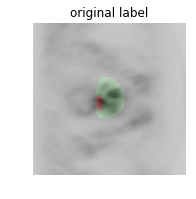

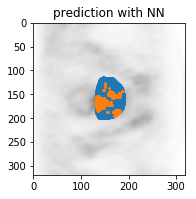

In [131]:
plot_prediction (11,22,3,y_val,y_pred)